In [122]:
import pandas as pd
import matplotlib.pyplot as plt

In [123]:
df = pd.read_csv(r'E:\hacktiv8\ftds009\dataset\data-2.csv')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [125]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [126]:
df['GMV'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,GMV
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [140]:
df[(df['CustomerID']>0)][['Country','GMV']].groupby('Country').sum().sort_values('GMV',ascending=False)

,GMV
Country,
United Kingdom,6767873.394
Netherlands,284661.540
EIRE,250285.220
Germany,221698.210
France,196712.840
Australia,137077.270
Switzerland,55739.400
Spain,54774.580
Belgium,40910.960


In [127]:
df['InvoiceDate'].aggregate({'min','max'})

min   2010-12-01 08:26:00
max   2011-12-09 12:50:00
Name: InvoiceDate, dtype: datetime64[ns]

In [128]:
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [129]:
df2 = df[(df['GMV']>0)&(df['CustomerID']>0)][['Country','GMV']].groupby('Country').sum().sort_values('GMV',ascending=False)

In [130]:
df3 = df[df['GMV']>0][['Country','CustomerID']].groupby(['Country']).nunique().sort_values('CustomerID',ascending=False)

In [131]:
df4 = df3.join(df2,on='Country')
df4['GMV per Customer'] = df4['GMV'] / df4['CustomerID']
df4.rename(columns={'CustomerID':'CustomerCount'}).sort_values(['GMV per Customer','CustomerCount'],ascending=False,inplace=True)

In [132]:
df4

,CustomerID,GMV,GMV per Customer
Country,,,
United Kingdom,3920,7308391.554,1864.385601
Germany,94,228867.140,2434.756809
France,87,209024.050,2402.575287
Spain,30,61577.110,2052.570333
Belgium,25,41196.340,1647.853600
Switzerland,21,56443.950,2687.807143
Portugal,19,33439.890,1759.994211
Italy,14,17483.240,1248.802857
Finland,12,22546.080,1878.840000


In [133]:
df4.loc[['United Kingdom','Germany','USA']]

,CustomerID,GMV,GMV per Customer
Country,,,
United Kingdom,3920,7308391.554,1864.385601
Germany,94,228867.140,2434.756809
USA,4,3580.390,895.097500


In [134]:
df_Germany = df[(df['Country']=='Germany') & (df['GMV']>0)].copy()

In [135]:
df_Germany.sort_values(['GMV','Quantity'],ascending=False)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,GMV
378279,569640,22423,REGENCY CAKESTAND 3 TIER,80,2011-10-05 12:25:00,10.95,12471.0,Germany,876.00
534968,581179,22423,REGENCY CAKESTAND 3 TIER,64,2011-12-07 15:43:00,10.95,12471.0,Germany,700.80
410820,572134,23427,STOOL HOME SWEET HOME,60,2011-10-21 10:13:00,10.40,12500.0,Germany,624.00
479544,577168,22423,REGENCY CAKESTAND 3 TIER,56,2011-11-18 10:42:00,10.95,12603.0,Germany,613.20
398150,571223,M,Manual,1,2011-10-14 13:36:00,599.50,13810.0,Germany,599.50
...,...,...,...,...,...,...,...,...,...
210534,555282,23224,CHERUB HEART DECORATION GOLD,1,2011-06-02 09:04:00,0.83,12709.0,Germany,0.83
210535,555282,23221,REINDEER HEART DECORATION SILVER,1,2011-06-02 09:04:00,0.83,12709.0,Germany,0.83
494776,578273,23309,SET OF 60 I LOVE LONDON CAKE CASES,1,2011-11-23 13:41:00,0.55,14335.0,Germany,0.55
494775,578273,22999,TRAVEL CARD WALLET VINTAGE LEAF,1,2011-11-23 13:41:00,0.42,14335.0,Germany,0.42


In [144]:
df[df['CustomerID']>0].sort_values(['Quantity'],ascending=False).head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,GMV
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom,168469.60
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,77183.60
502122,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,2011-11-25 15:57:00,0.00,13256.0,United Kingdom,0.00
421632,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,2011-10-27 12:26:00,0.21,12901.0,United Kingdom,1008.00
206121,554868,22197,SMALL POPCORN HOLDER,4300,2011-05-27 10:52:00,0.72,13135.0,United Kingdom,3096.00
97432,544612,22053,EMPIRE DESIGN ROSETTE,3906,2011-02-22 10:43:00,0.82,18087.0,United Kingdom,3202.92
270885,560599,18007,ESSENTIAL BALM 3.5g TIN IN ENVELOPE,3186,2011-07-19 17:04:00,0.06,14609.0,United Kingdom,191.16
160546,550461,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2011-04-18 13:20:00,2.10,15749.0,United Kingdom,6539.40
52711,540815,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2011-01-11 12:55:00,2.10,15749.0,United Kingdom,6539.40
433788,573995,16014,SMALL CHINESE STYLE SCISSOR,3000,2011-11-02 11:24:00,0.32,16308.0,United Kingdom,960.00


In [145]:
df[(df['CustomerID']>0)&(df['Country']=='Germany')].sort_values(['Quantity'],ascending=False).head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,GMV
187574,552978,15036,ASSORTED COLOURS SILK FAN,600,2011-05-12 14:46:00,0.65,12590.0,Germany,390.00
383671,570082,23379,PACK OF 12 RED APPLE TISSUES,432,2011-10-07 11:19:00,0.32,12524.0,Germany,138.24
229429,557055,15036,ASSORTED COLOURS SILK FAN,300,2011-06-16 14:45:00,0.83,12621.0,Germany,249.00
93216,544281,22585,PACK OF 6 BIRDY GIFT TAGS,288,2011-02-17 12:23:00,1.06,12500.0,Germany,305.28
233237,557466,84568,GIRLS ALPHABET IRON ON PATCHES,288,2011-06-20 13:08:00,0.21,13815.0,Germany,60.48
479095,577135,84598,BOYS ALPHABET IRON ON PATCHES,288,2011-11-18 08:56:00,0.21,12427.0,Germany,60.48
163779,550625,22893,MINI CAKE STAND T-LIGHT HOLDER,288,2011-04-19 14:02:00,0.36,12619.0,Germany,103.68
381790,569893,16045,POPART WOODEN PENCILS ASST,200,2011-10-06 15:51:00,0.04,12627.0,Germany,8.00
101819,544933,10135,COLOURING PENCILS BROWN TUBE,200,2011-02-25 08:44:00,1.06,12633.0,Germany,212.00
460131,575896,22629,SPACEBOY LUNCH BOX,192,2011-11-11 14:52:00,1.65,12480.0,Germany,316.80


## UK

In [136]:
df_UK = df[(df['Country']=='United Kingdom') & (df['GMV']>0)].copy()

In [137]:
df_UK.sort_values(['GMV','Quantity'],ascending=False).head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,GMV
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom,168469.60
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,77183.60
222680,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,2011-06-10 15:28:00,649.50,15098.0,United Kingdom,38970.00
15017,537632,AMAZONFEE,AMAZON FEE,1,2010-12-07 15:08:00,13541.33,NaN,United Kingdom,13541.33
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom,11062.06


In [138]:
df_UK.sort_values('InvoiceDate',ascending=True,inplace=True)
df_UK['Month'] = df_UK['InvoiceDate'].dt.to_period('M')
UK_monthly_GMV = df_UK[['Month','GMV']].groupby('Month').sum()
UK_monthly_GMV

,GMV
Month,
2010-12,748268.980
2011-01,561289.980
2011-02,430027.950
2011-03,586230.280
2011-04,476517.761
2011-05,639314.360
2011-06,619510.670
2011-07,601994.841
2011-08,608047.480


TypeError: float() argument must be a string or a real number, not 'Period'

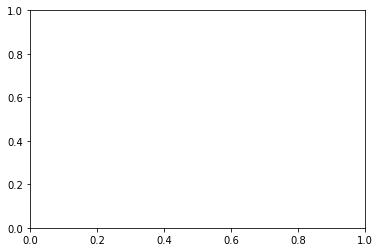

In [139]:
fig = plt.plot(UK_monthly_GMV.index[:-1],UK_monthly_GMV[:-1]['GMV'])
plt.title("Yearly UK GMV")
plt.xlabel("Month")
plt.ylabel("GMV in MUSD")

## USA

In [ ]:
df_USA = df[(df['Country']=='USA') & (df['GMV']>0)].copy()

In [ ]:
df_USA.sort_values('InvoiceDate',ascending=True,inplace=True)


In [ ]:
df_USA['Month'] = df_USA['InvoiceDate'].dt.to_period('M')


In [ ]:
USA_monthly_GMV = df_USA[['Month','GMV']].groupby('Month').sum().reset_index
USA_monthly_GMV

In [ ]:
fig = plt.plot(USA_monthly_GMV.index[:-1],USA_monthly_GMV[:-1]['GMV'])
plt.title("Yearly USA GMV")
plt.xlabel("Month")
plt.ylabel("GMV in MUSD")